In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [3]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH01-Basic", set_enable=False)

LangSmith 추적을 하지 않습니다.


## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

`temperature`

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

`model_name`: 적용 가능한 모델 리스트
- `gpt-3.5-turbo`
- `gpt-4-turbo`
- `gpt-4o`

![gpt-models.png](./images/gpt-models.png)

- 링크: https://platform.openai.com/docs/models


In [5]:
ChatOpenAI?  # chatopenai에서 사용하는 파라미터들이나 예시 문구들이 나와있음. docstring.

SyntaxError: invalid syntax (4288147305.py, line 1)

In [6]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(
    f"[답변]: {llm.invoke(question)}"
)  # question을 LLM에게 넣어줄 때 invoke 함수를 사용한다.
# 과금 문제로 인해 답변을 줄 때 추가 정보들이 같이 리턴되어 출력된다.
# completion_tokes : 답변에 사용된 토큰
# prompt_tokes : 질의에 사용된 토큰

[답변]: content='대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 명소를 자랑합니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 16, 'total_tokens': 53}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_a2ff031fb5', 'finish_reason': 'stop', 'logprobs': None} id='run-b229444b-7323-4fd6-9f60-113ca1d43570-0' usage_metadata={'input_tokens': 16, 'output_tokens': 37, 'total_tokens': 53}


### 답변의 형식(AI Message)

In [6]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [7]:
response

# 출력 결과가 AIMessage 라는 객체로 감싸져 있다.

AIMessage(content='대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 중요한 정부 기관과 기업들이 위치해 있습니다. 또한, 다양한 역사적 유적지와 현대적인 건축물이 공존하는 도시로, 많은 관광객들이 방문하는 곳이기도 합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 16, 'total_tokens': 80}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27', 'finish_reason': 'stop', 'logprobs': None}, id='run-3e4a2720-5425-40b3-a2b4-52659de66675-0', usage_metadata={'input_tokens': 16, 'output_tokens': 64, 'total_tokens': 80})

In [15]:
response.content

print(response.content)
# 답변만 깔끔하게 가져오고 싶을 때.

대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 중요한 정부 기관과 기업들이 위치해 있습니다. 또한, 다양한 역사적 유적지와 현대적인 건축물이 공존하는 도시로, 많은 관광객들이 방문하는 곳이기도 합니다.


In [12]:
response.response_metadata

{'token_usage': {'completion_tokens': 64,
  'prompt_tokens': 16,
  'total_tokens': 80},
 'model_name': 'gpt-4o-2024-05-13',
 'system_fingerprint': 'fp_3aa7262c27',
 'finish_reason': 'stop',
 'logprobs': None}

In [13]:
response.response_metadata["token_usage"]["total_tokens"]
# 매 답변마다 실질적으로 토큰이 얼마만큼 쓰였는지 트래킹이 가능하다.

80

### LogProb 활성화

주어진 텍스트에 대한 모델의 **토큰 확률의 로그 값** 을 의미합니다. 토큰이란 문장을 구성하는 개별 단어나 문자 등의 요소를 의미하고, 확률은 **모델이 그 토큰을 예측할 확률**을 나타냅니다.



In [16]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
).bind(logprobs=True)

In [17]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)

In [18]:
# 결과 출력
response.response_metadata

{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.022742305,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -1.9816675e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -3.1281633e-07,
    'top_logprobs': []},
   {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -4.1273333e-06,
    'top_logprobs': []},
   {'token': ' 수',
    'bytes': [32, 236, 136, 152],
    'logprob': -5.5122365e-07,
    'top_logprobs': []},
   {'token':

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [21]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [22]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
final_answer = ""

for token in answer:
    print(token.content, end="", flush=True)
    final_answer += token.content

# final_answer에다가 토큰을 하나씩 이어붙였기 때문에 최종 답변이 변수에 저장되어 있다. 

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 다음은 그 중 10곳과 그 주소입니다:

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로 2070-61

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

6. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **부여 백제문화단지**
    - 주소: 충청남도 부여군 규암면 백제문로 455

이곳들은 각기 다른 매력을 지니고 있어 다양한 경험을 할 수 있습니다. 즐거운 여행 되세요!

In [20]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

# token.content로 토큰 하나하나를 찍는 것. 쭉 찍는 거를 이어 붙여서 출력한 것.
# 이 결과물들을 나중에 재활용을 하고 싶은데 재활용이 안됨.
# 얘는 한마디로 이 한개의 토큰들을 그냥 출력만 하고 끝나버림. 어딘가에 저장을 하지 않았음.

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 다음은 그 중 10곳과 그 주소입니다:

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로 2070-61

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

7. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

8. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **속초 영랑호**
    - 주소: 강원도 속초시 영랑호반길 140

이 외에도 대한민국에는 많은 아름다운 관광지가 있으니, 기회가 된다면 여러 곳을 방문해 보세요!

In [ ]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer) # 이것도 출력 값이 어디 저장되지 않고 출력만 하고 끝.
final_answer2 = stream_response(answer, return_output=True) # 출력 결과를 저장할 수 있도록 함.

In [ ]:
print(final_answer2)

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4o` 나 `gpt-4-turbo` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [7]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    # max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


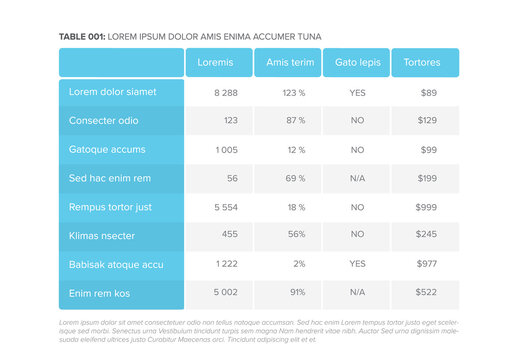

이 이미지는 표 형식의 데이터 테이블을 보여줍니다. 표의 제목은 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"입니다. 표는 다섯 개의 열과 여덟 개의 행으로 구성되어 있습니다.

각 열의 제목은 다음과 같습니다:
1. Loremis
2. Amis terim
3. Gáto lepis
4. Tortores

각 행의 내용은 다음과 같습니다:
1. Lorem dolor siamet: 8 288, 123%, YES, $89
2. Consecter odio: 123, 87%, NO, $129
3. Gatoque accums: 1 005, 12%, NO, $199
4. Sed hac enim rem: 56, 69%, N/A, $199
5. Rempus tortor just: 5 554, 18%, NO, $999
6. Klimas nsecter: 455, 56%, NO, $245
7. Babiask atque accu: 1 222, 2%, YES, $977
8. Enim rem kos: 5 002, 91%, N/A, $522

표의 하단에는 작은 글씨로 Lorem ipsum 텍스트가 포함되어 있습니다.

In [8]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


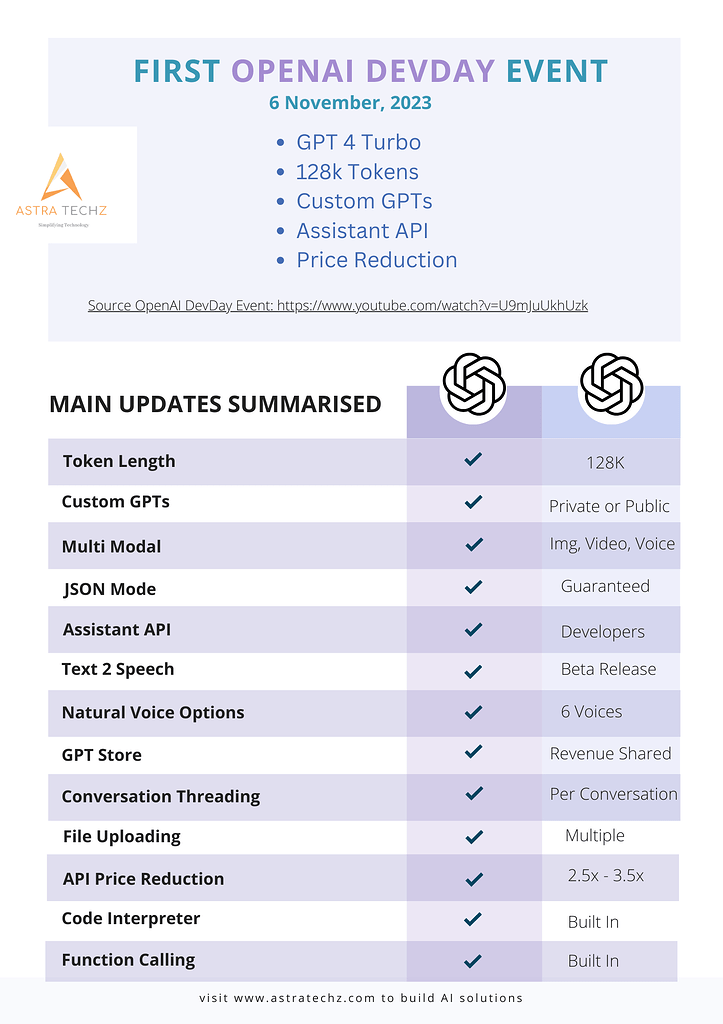

이미지 대체 텍스트:

"FIRST OPENAI DEVDAY EVENT"라는 제목이 상단에 있으며, 날짜는 2023년 11월 6일입니다. 주요 업데이트 항목으로는 GPT 4 Turbo, 128k Tokens, Custom GPTs, Assistant API, Price Reduction이 나열되어 있습니다. 

이미지의 왼쪽 상단에는 "ASTRA TECHZ" 로고가 있습니다.

주요 업데이트 요약 섹션에는 다음과 같은 항목들이 나열되어 있습니다:
- Token Length: 128K
- Custom GPTs: Private or Public
- Multi Modal: Img, Video, Voice
- JSON Mode: Guaranteed
- Assistant API: Developers
- Text 2 Speech: Beta Release
- Natural Voice Options: 6 Voices
- GPT Store: Revenue Shared
- Conversation Threading: Per Conversation
- File Uploading: Multiple
- API Price Reduction: 2.5x - 3.5x
- Code Interpreter: Built In
- Function Calling: Built In

이미지 하단에는 "visit www.astratechz.com to build AI solutions"라는 문구가 있습니다.

In [10]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/sample-image.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

## System, User 프롬프트 수정

In [11]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


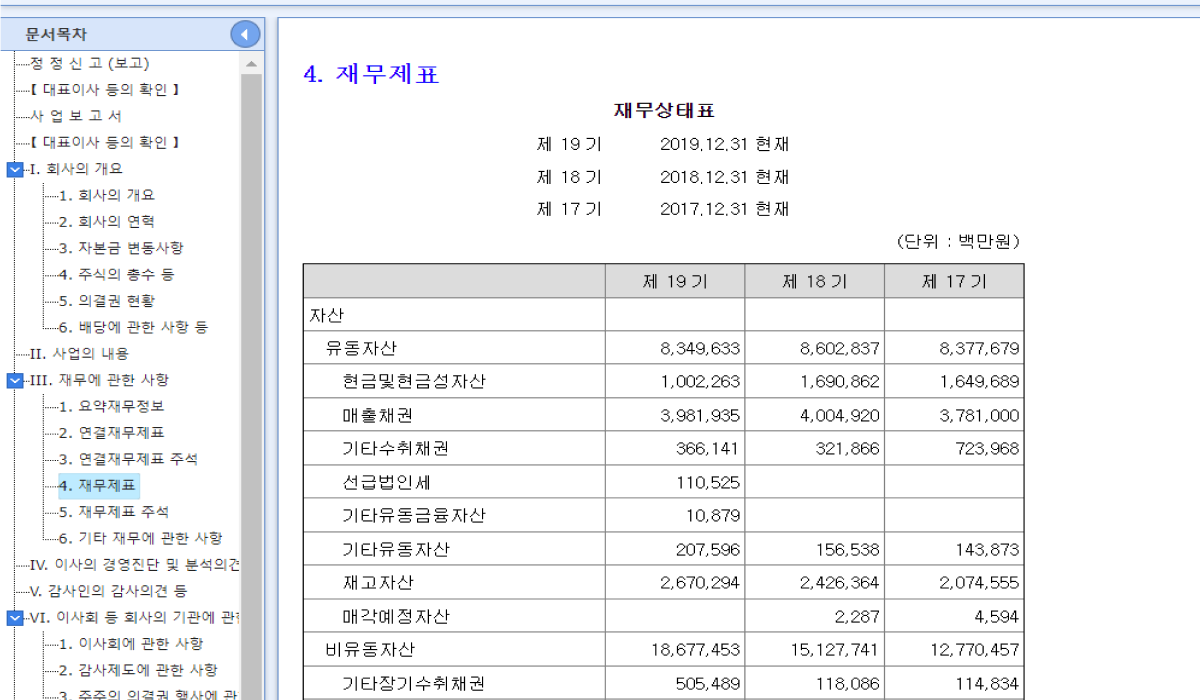

주어진 재무제표를 분석한 결과, 다음과 같은 흥미로운 사실들을 발견할 수 있습니다:

1. **유동자산의 변화**:
   - 제 19기(2019년) 유동자산은 8,349,633백만원으로, 제 18기(2018년) 8,602,837백만원에 비해 감소하였습니다.
   - 특히 현금 및 현금성 자산이 제 18기 1,690,862백만원에서 제 19기 1,002,263백만원으로 크게 감소하였습니다.

2. **매출채권의 변화**:
   - 매출채권은 제 18기 4,004,920백만원에서 제 19기 3,981,935백만원으로 소폭 감소하였습니다.

3. **기타수취채권의 변화**:
   - 기타수취채권은 제 18기 321,866백만원에서 제 19기 366,141백만원으로 증가하였습니다.

4. **선급법인세**:
   - 선급법인세는 제 18기 0백만원에서 제 19기 110,525백만원으로 새롭게 발생하였습니다.

5. **기타유동금융자산**:
   - 기타유동금융자산은 제 18기 0백만원에서 제 19기 10,879백만원으로 새롭게 발생하였습니다.

6. **기타유동자산**:
   - 기타유동자산은 제 18기 156,538백만원에서 제 19기 207,596백만원으로 증가하였습니다.

7. **비유동자산의 변화**:
   - 비유동자산은 제 18기 15,127,741백만원에서 제 19기 18,677,453백만원으로 크게 증가하였습니다.
   - 특히, 매각예정자산이 제 18기 2,287백만원에서 제 19기 0백만원으로 감소하였습니다.

8. **기타장기수취채권**:
   - 기타장기수취채권은 제 18기 118,086백만원에서 제 19기 505,489백만원으로 크게 증가하였습니다.

이러한 변화들은 회사의 자산 구조와 재무 상태에 중요한 영향을 미칠 수 있으며, 특히 현금성 자산의 감소와 비유동자산의 증가가 눈에 띕니다. 이는 회사의 유동성 관리와 장기 투자 전략에 대한 추가적인 분석이 필요함을 시사합니다.

In [12]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)